In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import eigsh
import sympy as sym


from FEM1D import FEM_k_1D as fem
import FEM1D

k-order Finite Element Method solver for the 1D Poisson problem:

$-u''=f \quad \in \Omega=(a,b)^2$

$u(a)=g(a)$ and $u(b)=g(b)$

for $g$ a given function.

C:\Users\matte\AppData\Local\Temp\ipykernel_15400\3805862571.py:22: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Uh = sp.linalg.spsolve(A,F)


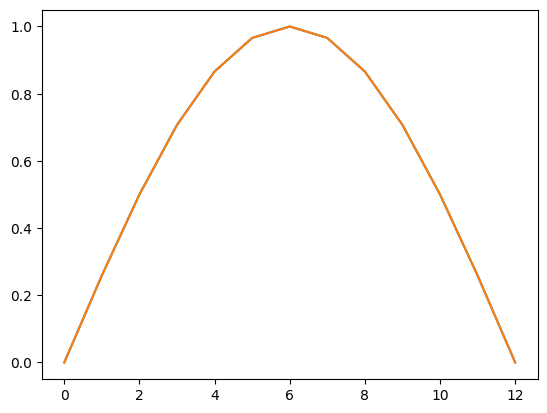

7.444086975583186e-05


In [2]:
# Problem
omega = [0,np.pi]
rhs = lambda x: np.sin(x)
sol = lambda x: np.sin(x)

# degree of FEM basis
degree = 3

# Number of quadrature points
n_qpoints = 2*degree-1

M = 4

N = M*degree+1

# call function computing FEM system
method = fem(omega, degree, M, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
A, F = method.FEM_POISSON()


# Solve the system
Uh = sp.linalg.spsolve(A,F)

# Compute exact solution
x=np.linspace(omega[0],omega[1],N)
U=sol(x)

# Plot solutions
plt.plot(Uh)
plt.plot(U)
plt.show()


# compute discrete max norm error
print(max(abs(U-Uh)))


In [3]:
# Number of experiments
no_experiments = 7

# Initialize
MM = np.zeros(no_experiments)
discrete_max_err = np.zeros(no_experiments)

# Solution loop
for i in range(no_experiments):
  M = 2**(i+2)
  MM[i] = M
  N = M*degree+1

  # call function computing FEM system
  method = fem(omega, degree, M, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
  A, F = method.FEM_POISSON()


  # Solve the system
  Uh = sp.linalg.spsolve(A,F)

  # Compute exact solution
  x=np.linspace(omega[0],omega[1],N)
  U=sol(x)

  # Compute discrete max norm error
  discrete_max_err[i] = max(abs(U-Uh))



C:\Users\matte\AppData\Local\Temp\ipykernel_15400\477060365.py:20: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Uh = sp.linalg.spsolve(A,F)


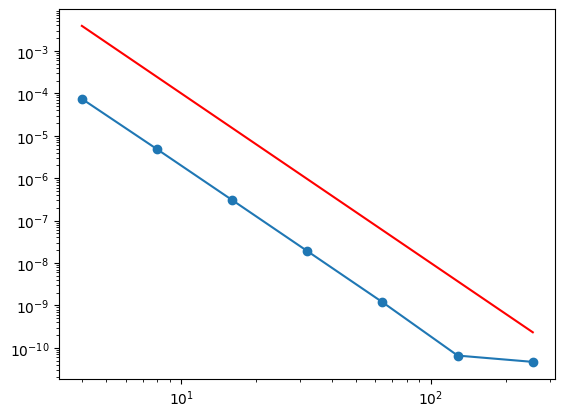

In [4]:
# Error loglog plots
plt.loglog(MM,discrete_max_err,'o-')
plt.loglog(MM,MM**(-(degree+1)),'r')
plt.show()

Point 1

Function for computing $H^1$-norm error and test convergence for $k>1$.

In [8]:
t = sym.var('t')
my_f = sym.sin(t)

# Number of experiments
no_experiments = 9

# Initialize
MM = np.zeros(no_experiments)
discrete_max_err = np.zeros(no_experiments)
H1_err = np.zeros(no_experiments)

# Solution loop
for i in range(no_experiments):
    M = 2**(i+2)
    MM[i] = M
    N = M*degree+1

    # call function computing FEM system
    method = fem(omega, degree, M, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
    A, F = method.FEM_POISSON()

    # Solve the system
    Uh = sp.linalg.spsolve(A,F)

    # Compute exact solution
    x=np.linspace(omega[0],omega[1],N)
    U=sol(x)

    # Compute discrete max norm error
    discrete_max_err[i] = max(abs(U-Uh))

    # Compute H1 norm of I_h u - u_h
    H1_err[i] = method.FEM1_H1(Uh, my_f, t)


C:\Users\matte\AppData\Local\Temp\ipykernel_15400\1504525916.py:23: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Uh = sp.linalg.spsolve(A,F)


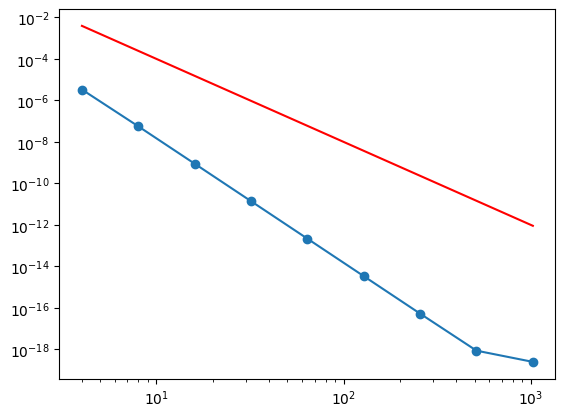

In [10]:
# Error loglog plots
plt.loglog(MM,H1_err,'o-')
#plt.loglog(MM,interpola_H1_err**(1/2),'bd-')
plt.loglog(MM,MM**(-(degree+1)),'r')
plt.show()

It is possible to observe that the EOC line is nomore parallel to ref. line and this means that order of convergence, until at some point , it is at least equal to the grade of polynomials used plus one. This is due to the fact that the solution in this case is regular so it makes sense to increase the grade of polynomials. However, at some point the error speed decrease an this could be the approach to a bound. Maybe it could be the type of float array used to store data or other theorical bound (for example HP bound). More analysis is needed here. 